## Notebook set up

Submit your notebook to the class leaderboard on HuggingFace at [huggingface.co/spaces/gperdrizet/leaderboard](https://huggingface.co/spaces/gperdrizet/leaderboard)

**Your task**: Apply at least two different feature engineering techniques to the `housing_df` dataframe to improve the dataset. At the end of the notebook, your engineered dataset and the original dataset will be used to train a linear regression model to predict `MedHouseVal`. Your goal is to achieve better model performance via feature engineering.

Don't change any of the code in the Model evaluation section of the notebook, especially the output saving. Otherwise the leaderboard scoring may not work!

**Note**: If you have read ahead or you are familiar with the basics of training ML models, no there is no train-test split and yes, this means data leakage/genralizability is a concern. We will cover those topics in the next unit. For now, the goal is to keep things simple while still giving you an idea of how your feature engineering effects model performance.

Before applying transformations, explore the dataset to understand what techniques would be most beneficial.

### Import libraries

In [1]:
%pip install seaborn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import (
    PowerTransformer,
    QuantileTransformer,
    StandardScaler
   
)
from sklearn.feature_extraction import FeatureHasher

# Set random seed for reproducibility
np.random.seed(315)

### Load dataset

In [3]:
# Load California housing dataset
original_housing_df = pd.read_csv('https://gperdrizet.github.io/FSA_devops/assets/data/unit2/california_housing.csv')
housing_df = original_housing_df.copy()

## Task 1: Explore the dataset

Before deciding what feature engineering techniques to apply, explore the dataset to understand its characteristics.

**Things to investigate**:
- Display basic information about the dataset (`.info()`, `.describe()`)
- Check for missing values
- Examine feature distributions (histograms, box plots)
- Look at feature scales and ranges

Use this exploration to inform your feature engineering decisions in the following tasks.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

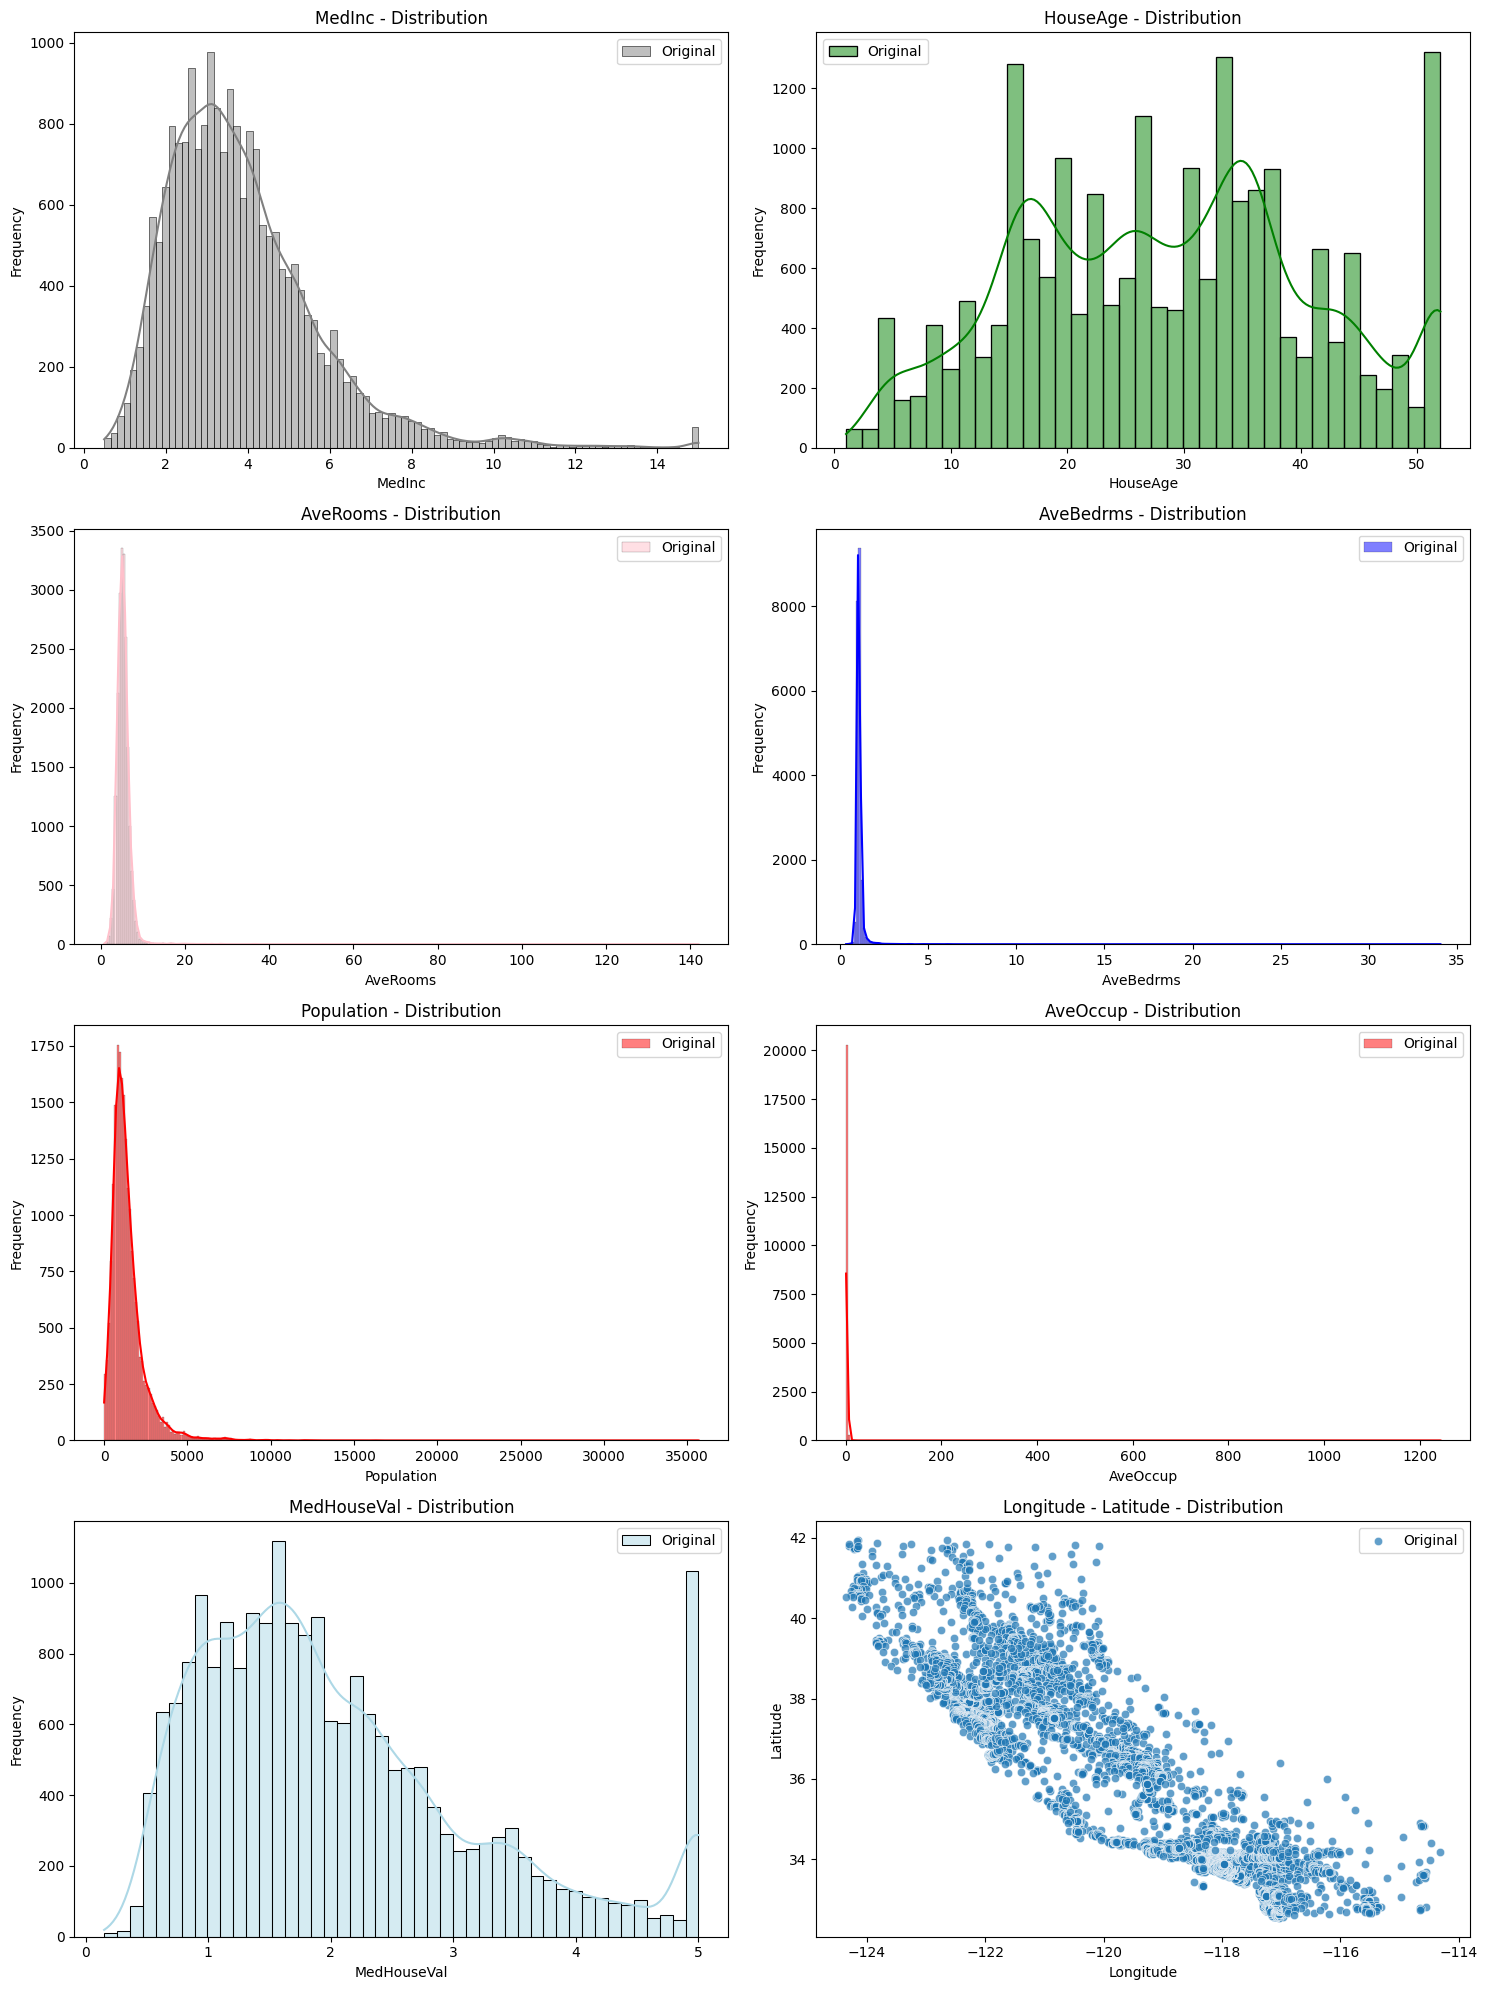

In [4]:
# YOUR CODE HERE
# Display basic information about the dataset (`.info()`, `.describe()`)
print(housing_df.info())
print(housing_df.describe())
#Check for missing values
print(housing_df.isnull())
print(housing_df.isnull().sum()) # Dont have any missing values
#Examine feature distributions (histograms, box plots)

# Draw Histograms 
fig, axes = plt.subplots(4, 2, figsize=(15,20)) # 2 rows, 2 columns


# MedInc - Distribution
sns.histplot(housing_df['MedInc'], kde=True, color='gray', label='Original', ax=axes[0,0],alpha=0.5)
axes[0,0].set_title('MedInc - Distribution')
axes[0,0].set_xlabel('MedInc')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()
# HouseAge - Distribution
sns.histplot(housing_df['HouseAge'], kde=True, color='green', label='Original', ax=axes[0,1],alpha=0.5)
axes[0,1].set_title('HouseAge - Distribution')
axes[0,1].set_xlabel('HouseAge')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend()
# AveRooms  - Distribution
sns.histplot(housing_df['AveRooms'], kde=True,color='pink', label='Original', ax=axes[1,0],alpha=0.5)
axes[1,0].set_title('AveRooms - Distribution')
axes[1,0].set_xlabel('AveRooms')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()
# AveBedrms - Distribution
sns.histplot(housing_df['AveBedrms'], kde=True, color='blue', label='Original', ax=axes[1,1],alpha=0.5)
axes[1,1].set_title('AveBedrms - Distribution')
axes[1,1].set_xlabel('AveBedrms ')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()
# Population - Distribution
sns.histplot(housing_df['Population'], kde=True, color='red', label='Original', ax=axes[2,0],alpha=0.5)
axes[2,0].set_title('Population - Distribution')
axes[2,0].set_xlabel('Population')
axes[2,0].set_ylabel('Frequency')
axes[2,0].legend()

# AveOccup - Distribution
sns.histplot(housing_df['AveOccup'], kde=True, color='red', label='Original', ax=axes[2,1],alpha=0.5)
axes[2,1].set_title('AveOccup - Distribution')
axes[2,1].set_xlabel('AveOccup')
axes[2,1].set_ylabel('Frequency')
axes[2,1].legend()

# MedHouseVal - Distribution
sns.histplot(housing_df['MedHouseVal'], kde=True, color='lightBlue', label='Original', ax=axes[3,0],alpha=0.5)
axes[3,0].set_title('MedHouseVal - Distribution')
axes[3,0].set_xlabel('MedHouseVal')
axes[3,0].set_ylabel('Frequency')
axes[3,0].legend()

# Longitude adn Latitude - Distribution
sns.scatterplot(x=housing_df['Longitude'],y=housing_df['Latitude'], label='Original', ax=axes[3,1],alpha=0.7)
axes[3,1].set_title('Longitude - Latitude - Distribution')
axes[3,1].set_xlabel('Longitude')
axes[3,1].set_ylabel('Latitude')
axes[3,1].legend()

plt.tight_layout()
plt.show()








## Task 2: Apply your first feature engineering technique

Based on your exploration, apply your first feature engineering technique.

**Example approaches**:
- Transform skewed features using log, sqrt, power, or quantile transformations
- Create bins/categories from continuous variables
- Create interaction features (e.g., rooms per household = total rooms / households)

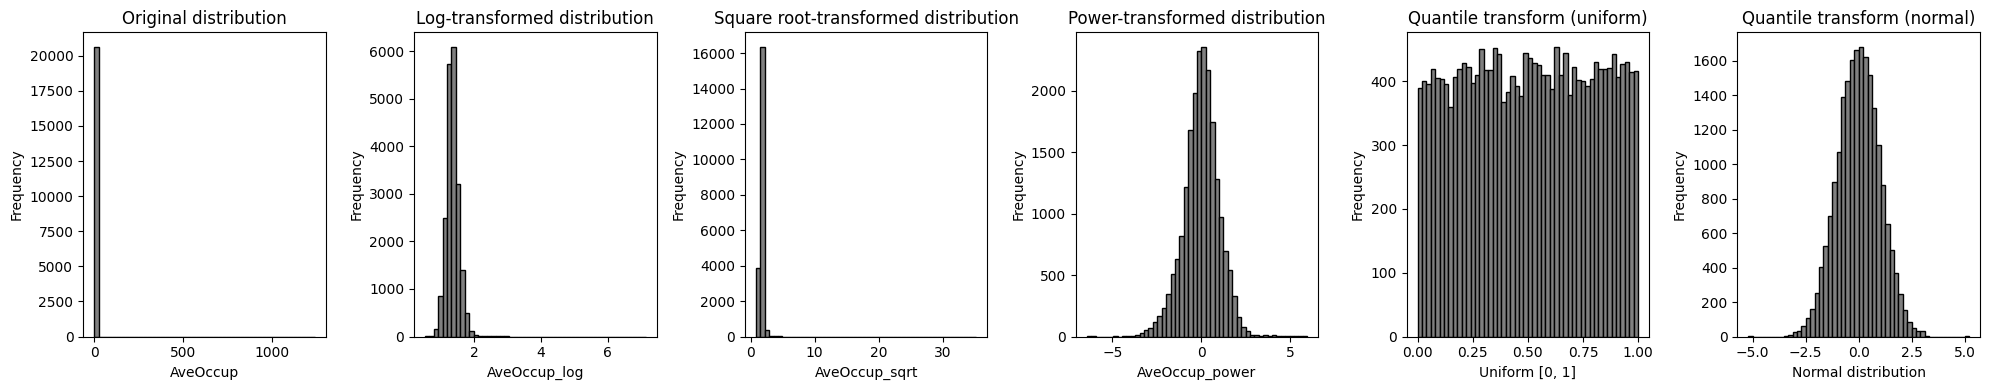

In [5]:
# YOUR CODE HERE
# Applying log,sqrt,power or quantile on heavily skewed features AveOccup, AveBedrms and AveRooms

# Transform AveOccup
feature = 'AveOccup'

# Apply log transformation (using log1p to handle zeros)
housing_df[f'{feature}_log'] = np.log1p(housing_df[feature])
# Apply square root transformation
housing_df[f'{feature}_sqrt'] = np.sqrt(housing_df[feature])
# Apply power transformation using Yeo-Johnson (handles positive and negative values)
transformer = PowerTransformer(method='yeo-johnson')
# Fit and transform
housing_df[f'{feature}_power'] = transformer.fit_transform(housing_df[[feature]])

# Apply quantile transformation to uniform distribution
transformer = QuantileTransformer(output_distribution='uniform')

housing_df[f'{feature}_quantile_uniform'] = transformer.fit_transform(housing_df[[feature]])

# Apply quantile transformation to normal distribution
transformer = QuantileTransformer(output_distribution='normal')

housing_df[f'{feature}_quantile_normal'] = transformer.fit_transform(housing_df[[feature]])

# Visualize before and after
fig, axes = plt.subplots(1, 6, figsize=(20, 4))

axes[0].set_title('Original distribution')
axes[0].hist(housing_df[feature], bins=50, edgecolor='black', color='grey')
axes[0].set_xlabel(feature)
axes[0].set_ylabel('Frequency')

axes[1].set_title('Log-transformed distribution')
axes[1].hist(housing_df[f'{feature}_log'], bins=50, edgecolor='black', color='grey')
axes[1].set_xlabel(f'{feature}_log')
axes[1].set_ylabel('Frequency')

axes[2].set_title('Square root-transformed distribution')
axes[2].hist(housing_df[f'{feature}_sqrt'], bins=50, edgecolor='black', color='grey')
axes[2].set_xlabel(f'{feature}_sqrt')
axes[2].set_ylabel('Frequency')

axes[3].set_title('Power-transformed distribution')
axes[3].hist(housing_df[f'{feature}_power'], bins=50, edgecolor='black', color='grey')
axes[3].set_xlabel(f'{feature}_power')
axes[3].set_ylabel('Frequency')

axes[4].set_title('Quantile transform (uniform)')
axes[4].hist(housing_df[f'{feature}_quantile_uniform'], bins=50, edgecolor='black', color='grey')
axes[4].set_xlabel('Uniform [0, 1]')
axes[4].set_ylabel('Frequency')

axes[5].set_xlabel('Normal distribution')
axes[5].set_title('Quantile transform (normal)')
axes[5].hist(housing_df[f'{feature}_quantile_normal'], bins=50, edgecolor='black', color='grey')
axes[5].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



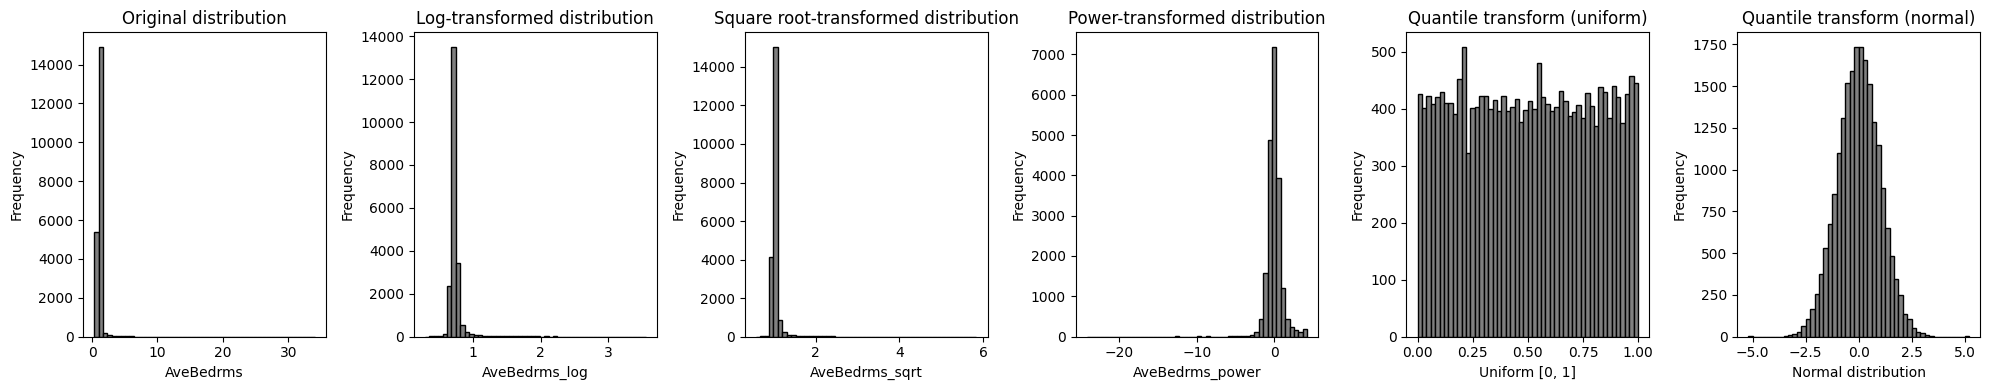

In [6]:
# Transform AveBedrms
feature = 'AveBedrms'

# Apply log transformation (using log1p to handle zeros)
housing_df[f'{feature}_log'] = np.log1p(housing_df[feature])
# Apply square root transformation
housing_df[f'{feature}_sqrt'] = np.sqrt(housing_df[feature])
# Apply power transformation using Yeo-Johnson (handles positive and negative values)
transformer = PowerTransformer(method='yeo-johnson')
# Fit and transform
housing_df[f'{feature}_power'] = transformer.fit_transform(housing_df[[feature]])

# Apply quantile transformation to uniform distribution
transformer = QuantileTransformer(output_distribution='uniform')

housing_df[f'{feature}_quantile_uniform'] = transformer.fit_transform(housing_df[[feature]])

# Apply quantile transformation to normal distribution
transformer = QuantileTransformer(output_distribution='normal')

housing_df[f'{feature}_quantile_normal'] = transformer.fit_transform(housing_df[[feature]])

# Visualize before and after
fig, axes = plt.subplots(1, 6, figsize=(20, 4))

axes[0].set_title('Original distribution')
axes[0].hist(housing_df[feature], bins=50, edgecolor='black', color='grey')
axes[0].set_xlabel(feature)
axes[0].set_ylabel('Frequency')

axes[1].set_title('Log-transformed distribution')
axes[1].hist(housing_df[f'{feature}_log'], bins=50, edgecolor='black', color='grey')
axes[1].set_xlabel(f'{feature}_log')
axes[1].set_ylabel('Frequency')

axes[2].set_title('Square root-transformed distribution')
axes[2].hist(housing_df[f'{feature}_sqrt'], bins=50, edgecolor='black', color='grey')
axes[2].set_xlabel(f'{feature}_sqrt')
axes[2].set_ylabel('Frequency')

axes[3].set_title('Power-transformed distribution')
axes[3].hist(housing_df[f'{feature}_power'], bins=50, edgecolor='black', color='grey')
axes[3].set_xlabel(f'{feature}_power')
axes[3].set_ylabel('Frequency')

axes[4].set_title('Quantile transform (uniform)')
axes[4].hist(housing_df[f'{feature}_quantile_uniform'], bins=50, edgecolor='black', color='grey')
axes[4].set_xlabel('Uniform [0, 1]')
axes[4].set_ylabel('Frequency')

axes[5].set_xlabel('Normal distribution')
axes[5].set_title('Quantile transform (normal)')
axes[5].hist(housing_df[f'{feature}_quantile_normal'], bins=50, edgecolor='black', color='grey')
axes[5].set_ylabel('Frequency')

plt.tight_layout()
plt.show()




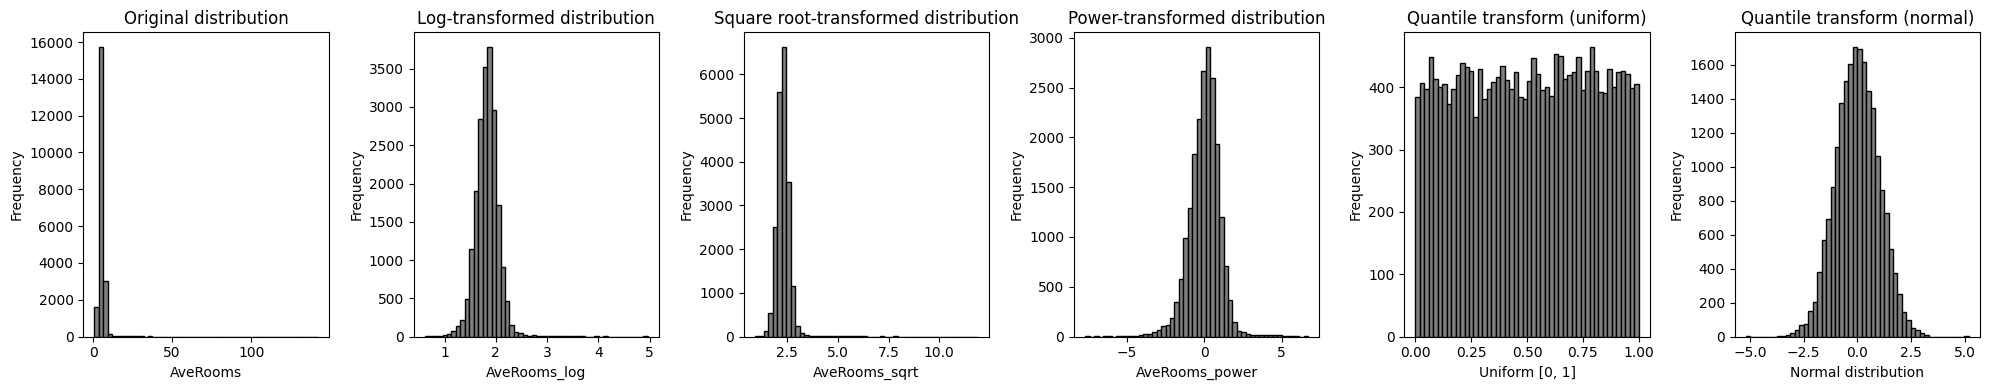

In [7]:
# Transform AveRooms
feature = 'AveRooms'

# Apply log transformation (using log1p to handle zeros)
housing_df[f'{feature}_log'] = np.log1p(housing_df[feature])
# Apply square root transformation
housing_df[f'{feature}_sqrt'] = np.sqrt(housing_df[feature])
# Apply power transformation using Yeo-Johnson (handles positive and negative values)
transformer = PowerTransformer(method='yeo-johnson')
# Fit and transform
housing_df[f'{feature}_power'] = transformer.fit_transform(housing_df[[feature]])

# Apply quantile transformation to uniform distribution
transformer = QuantileTransformer(output_distribution='uniform')

housing_df[f'{feature}_quantile_uniform'] = transformer.fit_transform(housing_df[[feature]])

# Apply quantile transformation to normal distribution
transformer = QuantileTransformer(output_distribution='normal')

housing_df[f'{feature}_quantile_normal'] = transformer.fit_transform(housing_df[[feature]])

# Visualize before and after
fig, axes = plt.subplots(1, 6, figsize=(20, 4))

axes[0].set_title('Original distribution')
axes[0].hist(housing_df[feature], bins=50, edgecolor='black', color='grey')
axes[0].set_xlabel(feature)
axes[0].set_ylabel('Frequency')

axes[1].set_title('Log-transformed distribution')
axes[1].hist(housing_df[f'{feature}_log'], bins=50, edgecolor='black', color='grey')
axes[1].set_xlabel(f'{feature}_log')
axes[1].set_ylabel('Frequency')

axes[2].set_title('Square root-transformed distribution')
axes[2].hist(housing_df[f'{feature}_sqrt'], bins=50, edgecolor='black', color='grey')
axes[2].set_xlabel(f'{feature}_sqrt')
axes[2].set_ylabel('Frequency')

axes[3].set_title('Power-transformed distribution')
axes[3].hist(housing_df[f'{feature}_power'], bins=50, edgecolor='black', color='grey')
axes[3].set_xlabel(f'{feature}_power')
axes[3].set_ylabel('Frequency')

axes[4].set_title('Quantile transform (uniform)')
axes[4].hist(housing_df[f'{feature}_quantile_uniform'], bins=50, edgecolor='black', color='grey')
axes[4].set_xlabel('Uniform [0, 1]')
axes[4].set_ylabel('Frequency')

axes[5].set_xlabel('Normal distribution')
axes[5].set_title('Quantile transform (normal)')
axes[5].hist(housing_df[f'{feature}_quantile_normal'], bins=50, edgecolor='black', color='grey')
axes[5].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



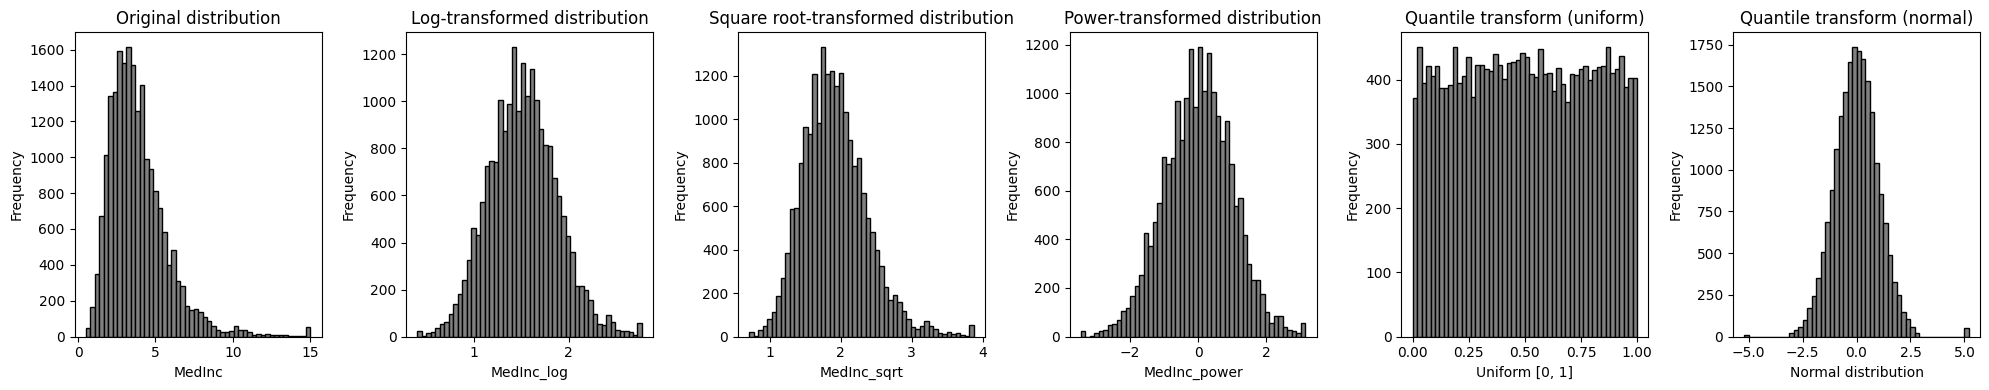

In [8]:
# Transform MedInc
feature = 'MedInc'

# Apply log transformation (using log1p to handle zeros)
housing_df[f'{feature}_log'] = np.log1p(housing_df[feature])
# Apply square root transformation
housing_df[f'{feature}_sqrt'] = np.sqrt(housing_df[feature])
# Apply power transformation using Yeo-Johnson (handles positive and negative values)
transformer = PowerTransformer(method='yeo-johnson')
# Fit and transform
housing_df[f'{feature}_power'] = transformer.fit_transform(housing_df[[feature]])

# Apply quantile transformation to uniform distribution
transformer = QuantileTransformer(output_distribution='uniform')

housing_df[f'{feature}_quantile_uniform'] = transformer.fit_transform(housing_df[[feature]])

# Apply quantile transformation to normal distribution
transformer = QuantileTransformer(output_distribution='normal')

housing_df[f'{feature}_quantile_normal'] = transformer.fit_transform(housing_df[[feature]])

# Visualize before and after
fig, axes = plt.subplots(1, 6, figsize=(20, 4))

axes[0].set_title('Original distribution')
axes[0].hist(housing_df[feature], bins=50, edgecolor='black', color='grey')
axes[0].set_xlabel(feature)
axes[0].set_ylabel('Frequency')

axes[1].set_title('Log-transformed distribution')
axes[1].hist(housing_df[f'{feature}_log'], bins=50, edgecolor='black', color='grey')
axes[1].set_xlabel(f'{feature}_log')
axes[1].set_ylabel('Frequency')

axes[2].set_title('Square root-transformed distribution')
axes[2].hist(housing_df[f'{feature}_sqrt'], bins=50, edgecolor='black', color='grey')
axes[2].set_xlabel(f'{feature}_sqrt')
axes[2].set_ylabel('Frequency')

axes[3].set_title('Power-transformed distribution')
axes[3].hist(housing_df[f'{feature}_power'], bins=50, edgecolor='black', color='grey')
axes[3].set_xlabel(f'{feature}_power')
axes[3].set_ylabel('Frequency')

axes[4].set_title('Quantile transform (uniform)')
axes[4].hist(housing_df[f'{feature}_quantile_uniform'], bins=50, edgecolor='black', color='grey')
axes[4].set_xlabel('Uniform [0, 1]')
axes[4].set_ylabel('Frequency')

axes[5].set_xlabel('Normal distribution')
axes[5].set_title('Quantile transform (normal)')
axes[5].hist(housing_df[f'{feature}_quantile_normal'], bins=50, edgecolor='black', color='grey')
axes[5].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



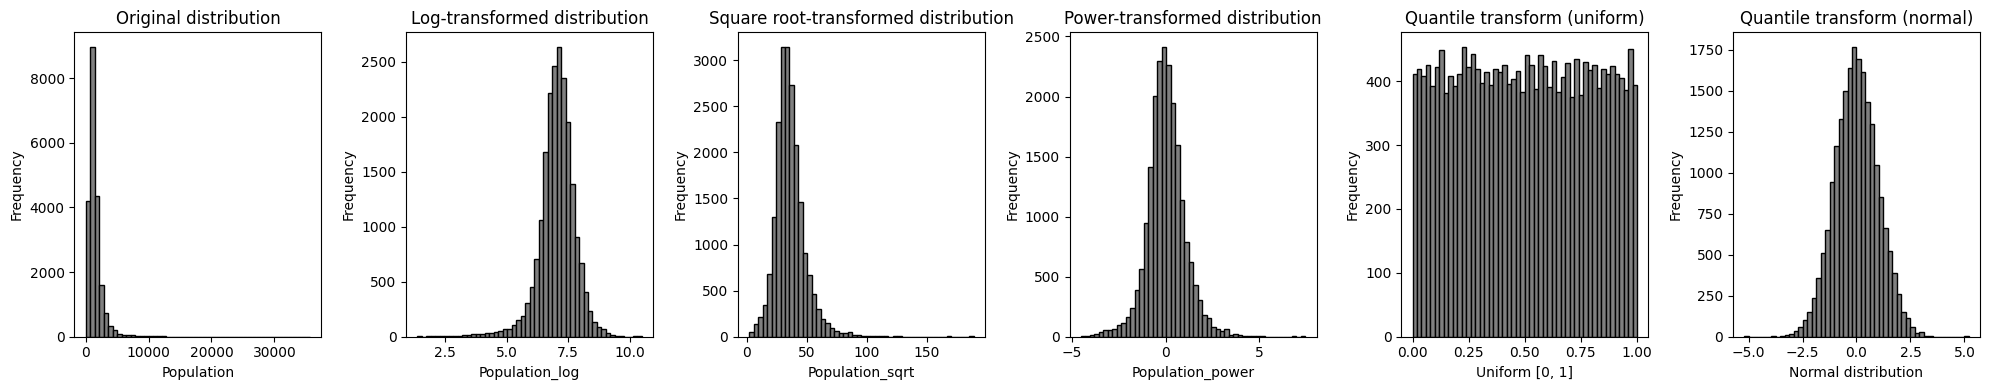

In [9]:
# Transform Population
feature = 'Population'

# Apply log transformation (using log1p to handle zeros)
housing_df[f'{feature}_log'] = np.log1p(housing_df[feature])
# Apply square root transformation
housing_df[f'{feature}_sqrt'] = np.sqrt(housing_df[feature])
# Apply power transformation using Yeo-Johnson (handles positive and negative values)
transformer = PowerTransformer(method='yeo-johnson')
# Fit and transform
housing_df[f'{feature}_power'] = transformer.fit_transform(housing_df[[feature]])

# Apply quantile transformation to uniform distribution
transformer = QuantileTransformer(output_distribution='uniform')

housing_df[f'{feature}_quantile_uniform'] = transformer.fit_transform(housing_df[[feature]])

# Apply quantile transformation to normal distribution
transformer = QuantileTransformer(output_distribution='normal')

housing_df[f'{feature}_quantile_normal'] = transformer.fit_transform(housing_df[[feature]])

# Visualize before and after
fig, axes = plt.subplots(1, 6, figsize=(20, 4))

axes[0].set_title('Original distribution')
axes[0].hist(housing_df[feature], bins=50, edgecolor='black', color='grey')
axes[0].set_xlabel(feature)
axes[0].set_ylabel('Frequency')

axes[1].set_title('Log-transformed distribution')
axes[1].hist(housing_df[f'{feature}_log'], bins=50, edgecolor='black', color='grey')
axes[1].set_xlabel(f'{feature}_log')
axes[1].set_ylabel('Frequency')

axes[2].set_title('Square root-transformed distribution')
axes[2].hist(housing_df[f'{feature}_sqrt'], bins=50, edgecolor='black', color='grey')
axes[2].set_xlabel(f'{feature}_sqrt')
axes[2].set_ylabel('Frequency')

axes[3].set_title('Power-transformed distribution')
axes[3].hist(housing_df[f'{feature}_power'], bins=50, edgecolor='black', color='grey')
axes[3].set_xlabel(f'{feature}_power')
axes[3].set_ylabel('Frequency')

axes[4].set_title('Quantile transform (uniform)')
axes[4].hist(housing_df[f'{feature}_quantile_uniform'], bins=50, edgecolor='black', color='grey')
axes[4].set_xlabel('Uniform [0, 1]')
axes[4].set_ylabel('Frequency')

axes[5].set_xlabel('Normal distribution')
axes[5].set_title('Quantile transform (normal)')
axes[5].hist(housing_df[f'{feature}_quantile_normal'], bins=50, edgecolor='black', color='grey')
axes[5].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



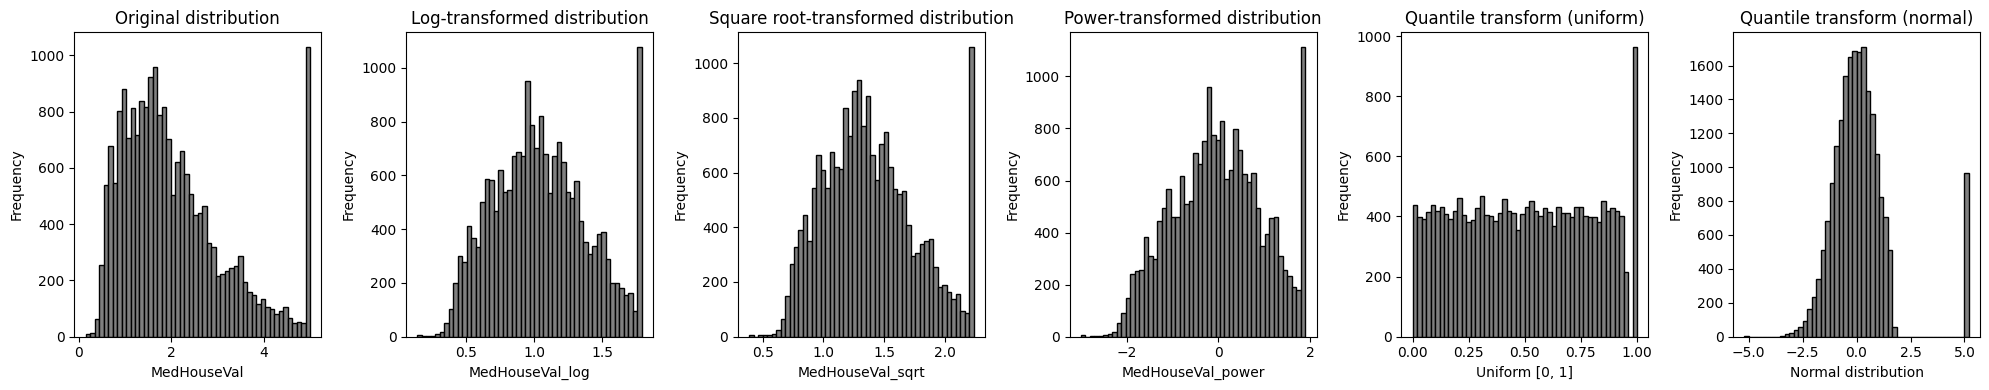

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MedInc                        20640 non-null  float64
 1   HouseAge                      20640 non-null  float64
 2   AveRooms                      20640 non-null  float64
 3   AveBedrms                     20640 non-null  float64
 4   Population                    20640 non-null  float64
 5   AveOccup                      20640 non-null  float64
 6   Latitude                      20640 non-null  float64
 7   Longitude                     20640 non-null  float64
 8   MedHouseVal                   20640 non-null  float64
 9   AveOccup_log                  20640 non-null  float64
 10  AveOccup_sqrt                 20640 non-null  float64
 11  AveOccup_power                20640 non-null  float64
 12  AveOccup_quantile_uniform     20640 non-null  float64
 13  A

In [10]:
# Transform MedHouseVal
feature = 'MedHouseVal'

# Apply log transformation (using log1p to handle zeros)
housing_df[f'{feature}_log'] = np.log1p(housing_df[feature])
# Apply square root transformation
housing_df[f'{feature}_sqrt'] = np.sqrt(housing_df[feature])
# Apply power transformation using Yeo-Johnson (handles positive and negative values)
transformer = PowerTransformer(method='yeo-johnson')
# Fit and transform
housing_df[f'{feature}_power'] = transformer.fit_transform(housing_df[[feature]])

# Apply quantile transformation to uniform distribution
transformer = QuantileTransformer(output_distribution='uniform')

housing_df[f'{feature}_quantile_uniform'] = transformer.fit_transform(housing_df[[feature]])

# Apply quantile transformation to normal distribution
transformer = QuantileTransformer(output_distribution='normal')

housing_df[f'{feature}_quantile_normal'] = transformer.fit_transform(housing_df[[feature]])

# Visualize before and after
fig, axes = plt.subplots(1, 6, figsize=(20, 4))

axes[0].set_title('Original distribution')
axes[0].hist(housing_df[feature], bins=50, edgecolor='black', color='grey')
axes[0].set_xlabel(feature)
axes[0].set_ylabel('Frequency')

axes[1].set_title('Log-transformed distribution')
axes[1].hist(housing_df[f'{feature}_log'], bins=50, edgecolor='black', color='grey')
axes[1].set_xlabel(f'{feature}_log')
axes[1].set_ylabel('Frequency')

axes[2].set_title('Square root-transformed distribution')
axes[2].hist(housing_df[f'{feature}_sqrt'], bins=50, edgecolor='black', color='grey')
axes[2].set_xlabel(f'{feature}_sqrt')
axes[2].set_ylabel('Frequency')

axes[3].set_title('Power-transformed distribution')
axes[3].hist(housing_df[f'{feature}_power'], bins=50, edgecolor='black', color='grey')
axes[3].set_xlabel(f'{feature}_power')
axes[3].set_ylabel('Frequency')

axes[4].set_title('Quantile transform (uniform)')
axes[4].hist(housing_df[f'{feature}_quantile_uniform'], bins=50, edgecolor='black', color='grey')
axes[4].set_xlabel('Uniform [0, 1]')
axes[4].set_ylabel('Frequency')

axes[5].set_xlabel('Normal distribution')
axes[5].set_title('Quantile transform (normal)')
axes[5].hist(housing_df[f'{feature}_quantile_normal'], bins=50, edgecolor='black', color='grey')
axes[5].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


housing_df.info()
column_list = housing_df.columns.tolist()
print(column_list)
housing_df.drop([#'AveOccup_log',
                 'AveOccup_sqrt', 
                 'AveOccup_power', 
                 'AveOccup_quantile_uniform',
                 'AveOccup_quantile_normal',
                 #'AveBedrms_log',
                 'AveBedrms_sqrt', 
                 'AveBedrms_power', 
                 'AveBedrms_quantile_uniform',
                 'AveBedrms_quantile_normal',
                 #'AveRooms_log',
                 'AveRooms_sqrt', 
                 'AveRooms_power', 
                 'AveRooms_quantile_uniform',
                 'AveRooms_quantile_normal',
                 #'Population_log',
                 'Population_sqrt', 
                 'Population_power', 
                 'Population_quantile_uniform',
                 'Population_quantile_normal',
                 #'MedInc_log',
                 'MedInc_sqrt', 
                 'MedInc_power', 
                 'MedInc_quantile_uniform', 
                 'MedInc_quantile_normal',
                 #'MedHouseVal_log',
                 'MedHouseVal_sqrt',
                 'MedHouseVal_power', 
                 'MedHouseVal_quantile_uniform',
                 'MedHouseVal_quantile_normal'], axis=1, inplace=True)

housing_df.info()

housing_df.drop(['MedInc',  'AveRooms', 'AveBedrms', 'Population', 'AveOccup','MedHouseVal'], axis=1, inplace=True)

housing_df.rename(columns={'MedInc_log':'MedInc', 'AveRooms_log': 'AveRooms','AveOccup_log':'AveOccup','AveBedrms_log':'AveBedrms', 'Population_log':'Population','MedHouseVal_log':'MedHouseVal'}, inplace=True)
housing_df.info()


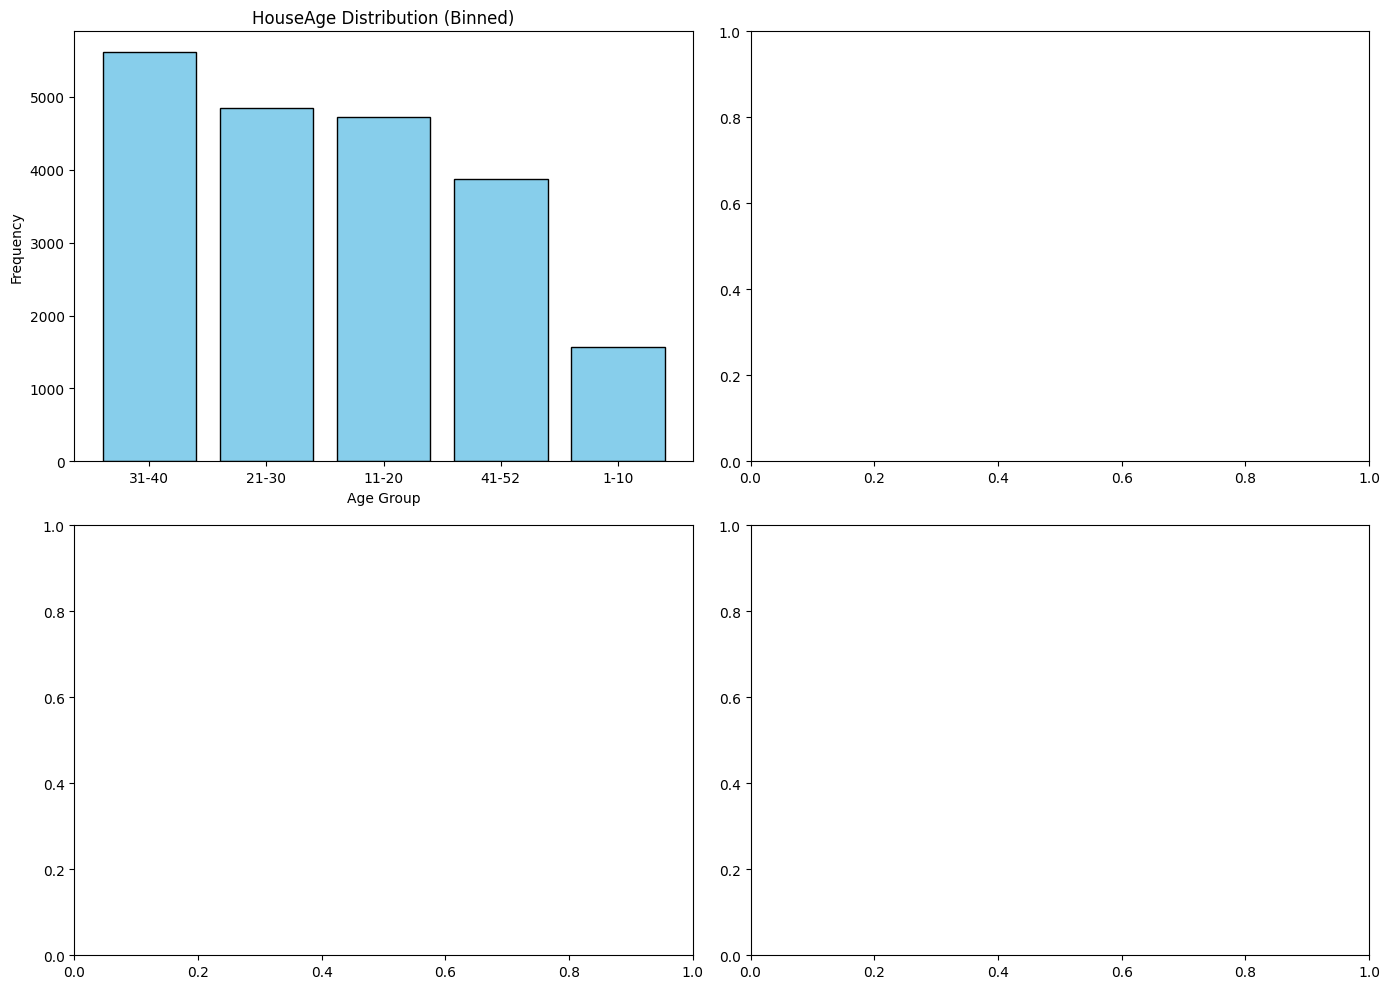


Binned features added:

Encoded binned features:
Original features replaced with binned encoded versions:
   Latitude  Longitude  AveOccup  AveBedrms  AveRooms    MedInc  Population  \
0     37.88    -122.23  1.268511   0.704982  2.077455  2.232720    5.777652   
1     37.86    -122.22  1.134572   0.678988  1.979364  2.230165    7.784057   
2     37.85    -122.24  1.335596   0.729212  2.228738  2.111110    6.208590   
3     37.85    -122.25  1.266369   0.729025  1.919471  1.893579    6.326149   
4     37.85    -122.25  1.157342   0.732888  1.985385  1.578195    6.338594   

   MedHouseVal  HouseAge  
0     1.709464         4  
1     1.522790         2  
2     1.508733         4  
3     1.484555         4  
4     1.486592         4  

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Latitude     20640 non-null  float64
 1   

In [11]:
## Create bins/categories from continuous variables

# Bin HouseAge into age groups
housing_df['HouseAge_binned'] = pd.cut(housing_df['HouseAge'], 
                                        bins=[0, 10, 20, 30, 40, 52], 
                                        labels=['1-10', '11-20', '21-30', '31-40', '41-52'])

# Bin Latitude into geographic regions
#housing_df['Latitude_binned'] = pd.cut(housing_df['Latitude'], bins=5, labels=['South', 'South-Central', 'Central', 'North-Central', 'North'])

# Bin Longitude into geographic regions
#housing_df['Longitude_binned'] = pd.cut(housing_df['Longitude'], bins=5, labels=['Far West', 'West', 'Central', 'East', 'Far East'])

# Bin MedInc into income brackets
#housing_df['MedInc_binned'] = pd.cut(housing_df['MedInc'], bins=[0, 2, 4, 6, 8, 16], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Convert binned columns to numeric codes for model compatibility
housing_df['HouseAge_binned_encoded'] = pd.Categorical(housing_df['HouseAge_binned']).codes
#housing_df['Latitude_binned_encoded'] = pd.Categorical(housing_df['Latitude_binned']).codes
#housing_df['Longitude_binned_encoded'] = pd.Categorical(housing_df['Longitude_binned']).codes
#housing_df['MedInc_binned_encoded'] = pd.Categorical(housing_df['MedInc_binned']).codes

# Visualize the binned features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# HouseAge binned
axes[0, 0].bar(housing_df['HouseAge_binned'].value_counts().index, 
               housing_df['HouseAge_binned'].value_counts().values, color='skyblue', edgecolor='black')
axes[0, 0].set_title('HouseAge Distribution (Binned)')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Frequency')

# Latitude binned
#axes[0, 1].bar(housing_df['Latitude_binned'].value_counts().index, 
 #              housing_df['Latitude_binned'].value_counts().values, color='lightcoral', edgecolor='black')
#axes[0, 1].set_title('Latitude Distribution (Binned)')
#axes[0, 1].set_xlabel('Region')
#axes[0, 1].set_ylabel('Frequency')

# Longitude binned
#axes[1, 0].bar(housing_df['Longitude_binned'].value_counts().index, 
 #             housing_df['Longitude_binned'].value_counts().values, color='lightgreen', edgecolor='black')
#axes[1, 0].set_title('Longitude Distribution (Binned)')
#axes[1, 0].set_xlabel('Region')
#axes[1, 0].set_ylabel('Frequency')

# MedInc binned
#axes[1, 1].bar(housing_df['MedInc_binned'].value_counts().index, 
            #   housing_df['MedInc_binned'].value_counts().values, color='gold', edgecolor='black')
#axes[1, 1].set_title('MedInc Distribution (Binned)')
#axes[1, 1].set_xlabel('Income Bracket')
#axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Display the binned dataframe info
print("\nBinned features added:")
#print(housing_df[['HouseAge_binned', 'Latitude_binned', 'Longitude_binned', 'MedInc_binned']].head(10))
print("\nEncoded binned features:")
#print(housing_df[['HouseAge_binned_encoded', 'Latitude_binned_encoded', 'Longitude_binned_encoded', 'MedInc_binned_encoded']].head(10))

# Replace original features with binned encoded versions
housing_df.drop(['HouseAge', 
                 #'Latitude', 
                 #'Longitude', 
                 #'MedInc', 
                 'HouseAge_binned',
                 #'Latitude_binned', 
                 #'Longitude_binned'
                 #'MedInc_binned'
                 ], 
                axis=1, inplace=True)

housing_df.rename(columns={
    'HouseAge_binned_encoded': 'HouseAge',
    #'Latitude_binned_encoded': 'Latitude',
    #'Longitude_binned_encoded': 'Longitude'
    #'MedInc_binned_encoded': 'MedInc'
}, inplace=True)

print("Original features replaced with binned encoded versions:")
print(housing_df.head())
print("\nDataframe info:")
print(housing_df.info())

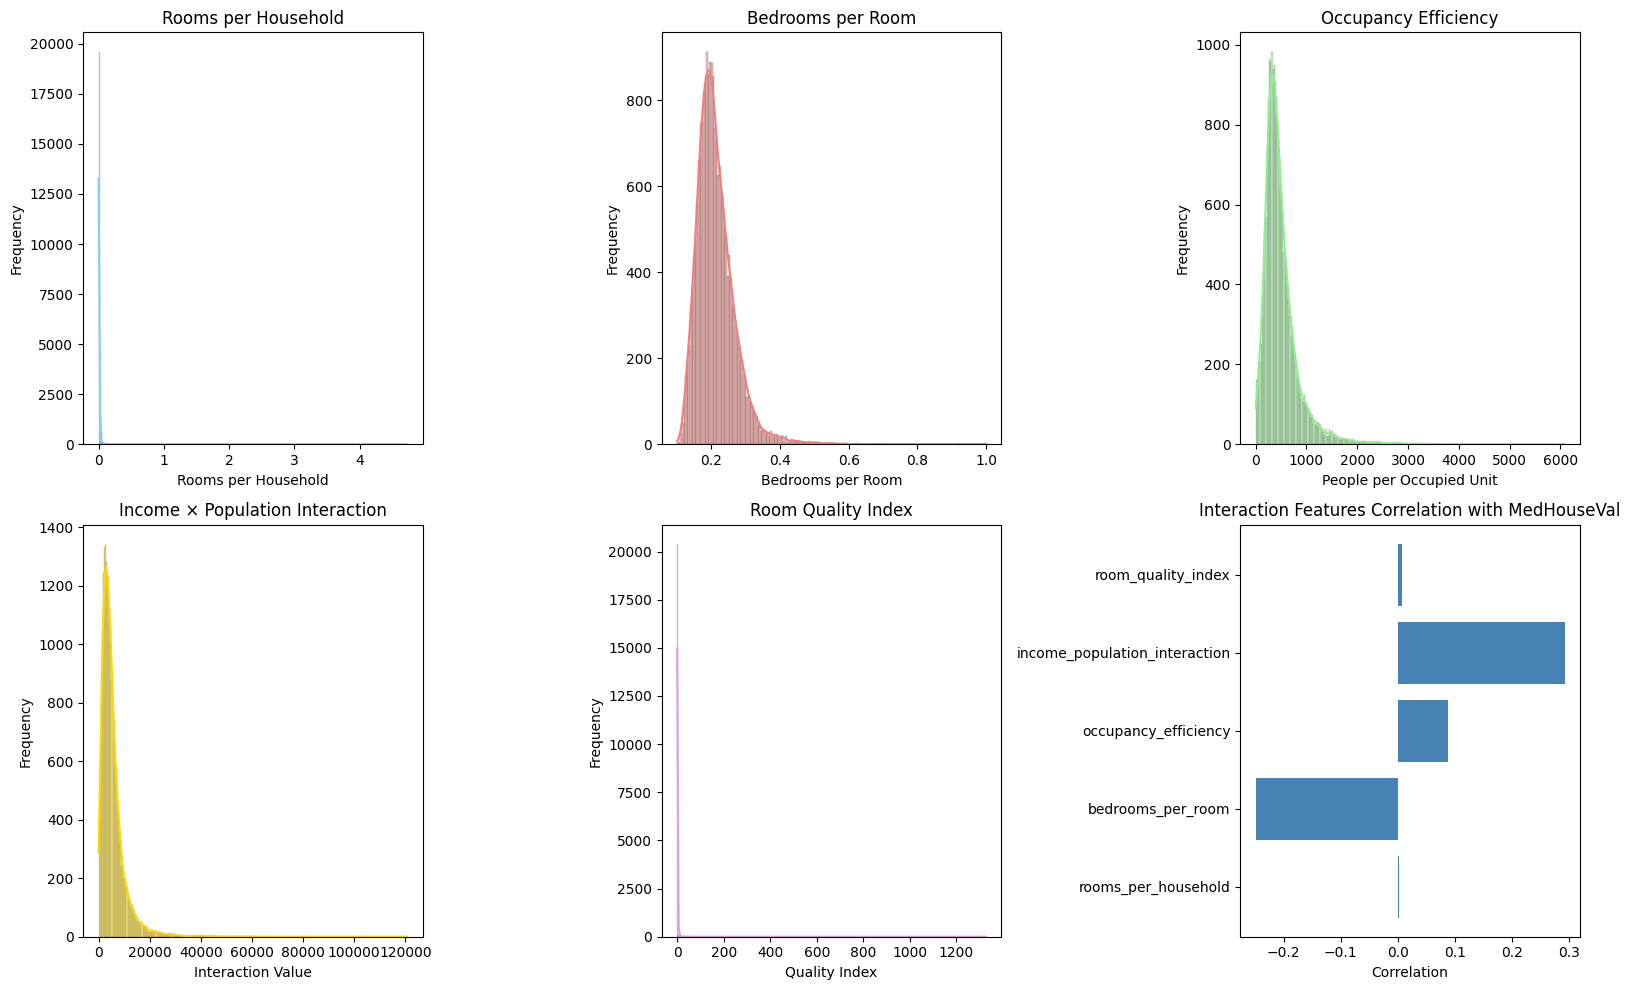

Interaction features created:
  - rooms_per_household: AveRooms / Population
  - bedrooms_per_room: AveBedrms / AveRooms
  - occupancy_efficiency: Population / AveOccup
  - income_population_interaction: MedInc × Population
  - room_quality_index: (AveRooms × AveBedrms) / (AveOccup + 1)

First few rows of interaction features:
   rooms_per_household  bedrooms_per_room  occupancy_efficiency  \
0             0.021690           0.146591                 126.0   
1             0.002598           0.155797                1138.0   
2             0.016710           0.129516                 177.0   
3             0.010425           0.184458                 219.0   
4             0.011118           0.172096                 259.0   
5             0.011529           0.231774                 193.0   
6             0.004508           0.192899                 514.0   
7             0.004147           0.221327                 647.0   
8             0.003561           0.260274                 595.0   
9

In [12]:
# Create interaction features

# Reload the original features to create interactions
# (We need the original Population and AveRooms values for interactions)
original_housing_df_temp = pd.read_csv('https://gperdrizet.github.io/FSA_devops/assets/data/unit2/california_housing.csv')

# Feature 1: Rooms per household (total rooms / population)
# This indicates room density relative to population
housing_df['rooms_per_household'] = original_housing_df_temp['AveRooms'] / original_housing_df_temp['Population']

# Feature 2: Bedrooms per room (bedrooms / rooms)
# This indicates the proportion of rooms that are bedrooms
housing_df['bedrooms_per_room'] = original_housing_df_temp['AveBedrms'] / original_housing_df_temp['AveRooms']

# Feature 3: Occupancy efficiency (population / occupancy)
# This indicates how many people per occupied unit
housing_df['occupancy_efficiency'] = original_housing_df_temp['Population'] / original_housing_df_temp['AveOccup']

# Feature 4: Income × Population interaction (scaled income with population size)
# Higher income areas with more population might have different value patterns
housing_df['income_population_interaction'] = original_housing_df_temp['MedInc'] * original_housing_df_temp['Population']

# Feature 5: Room quality index (rooms + bedrooms interaction normalized)
# Combines room count and bedroom count as a proxy for housing quality
housing_df['room_quality_index'] = (original_housing_df_temp['AveRooms'] * original_housing_df_temp['AveBedrms']) / (original_housing_df_temp['AveOccup'] + 1)

# Visualize the new interaction features
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# rooms_per_household
sns.histplot(housing_df['rooms_per_household'], kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Rooms per Household')
axes[0, 0].set_xlabel('Rooms per Household')
axes[0, 0].set_ylabel('Frequency')

# bedrooms_per_room
sns.histplot(housing_df['bedrooms_per_room'], kde=True, color='lightcoral', ax=axes[0, 1])
axes[0, 1].set_title('Bedrooms per Room')
axes[0, 1].set_xlabel('Bedrooms per Room')
axes[0, 1].set_ylabel('Frequency')

# occupancy_efficiency
sns.histplot(housing_df['occupancy_efficiency'], kde=True, color='lightgreen', ax=axes[0, 2])
axes[0, 2].set_title('Occupancy Efficiency')
axes[0, 2].set_xlabel('People per Occupied Unit')
axes[0, 2].set_ylabel('Frequency')

# income_population_interaction
sns.histplot(housing_df['income_population_interaction'], kde=True, color='gold', ax=axes[1, 0])
axes[1, 0].set_title('Income × Population Interaction')
axes[1, 0].set_xlabel('Interaction Value')
axes[1, 0].set_ylabel('Frequency')

# room_quality_index
sns.histplot(housing_df['room_quality_index'], kde=True, color='plum', ax=axes[1, 1])
axes[1, 1].set_title('Room Quality Index')
axes[1, 1].set_xlabel('Quality Index')
axes[1, 1].set_ylabel('Frequency')

# Correlation with target
ax = axes[1, 2]
interaction_cols = ['rooms_per_household', 'bedrooms_per_room', 'occupancy_efficiency', 
                   'income_population_interaction', 'room_quality_index']
correlations = [housing_df[col].corr(housing_df['MedHouseVal']) for col in interaction_cols]
ax.barh(interaction_cols, correlations, color='steelblue')
ax.set_title('Interaction Features Correlation with MedHouseVal')
ax.set_xlabel('Correlation')

plt.tight_layout()
plt.show()

print("Interaction features created:")
print(f"  - rooms_per_household: AveRooms / Population")
print(f"  - bedrooms_per_room: AveBedrms / AveRooms")
print(f"  - occupancy_efficiency: Population / AveOccup")
print(f"  - income_population_interaction: MedInc × Population")
print(f"  - room_quality_index: (AveRooms × AveBedrms) / (AveOccup + 1)")
print("\nFirst few rows of interaction features:")
print(housing_df[interaction_cols].head(10))
print("\nDataframe info:")
print(housing_df.info())

## Task 3: Apply your second feature engineering technique

**Example approaches**:
- Scale features to similar ranges
- Encode any categorical variables you created
- Create aggregate statistics by groups

FEATURE SCALING COMPARISON

Before Scaling (Original Features):
           Latitude     Longitude      AveOccup     AveBedrms      AveRooms  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean      35.631861   -119.569704      1.351645      0.732035      1.828722   
std        2.135952      2.003532      0.207530      0.105412      0.231938   
min       32.540000   -124.350000      0.526093      0.287682      0.613104   
25%       33.930000   -121.800000      1.232485      0.696182      1.693911   
50%       34.260000   -118.490000      1.339757      0.717245      1.829236   
75%       37.710000   -118.010000      1.454481      0.741712      1.953365   
max       41.950000   -114.310000      7.126355      3.557251      4.962209   

             MedInc    Population   MedHouseVal      HouseAge  \
count  20640.000000  20640.000000  20640.000000  20640.000000   
mean       1.516995      7.025503      1.056146      2.267006   
std        0.358677      0.73

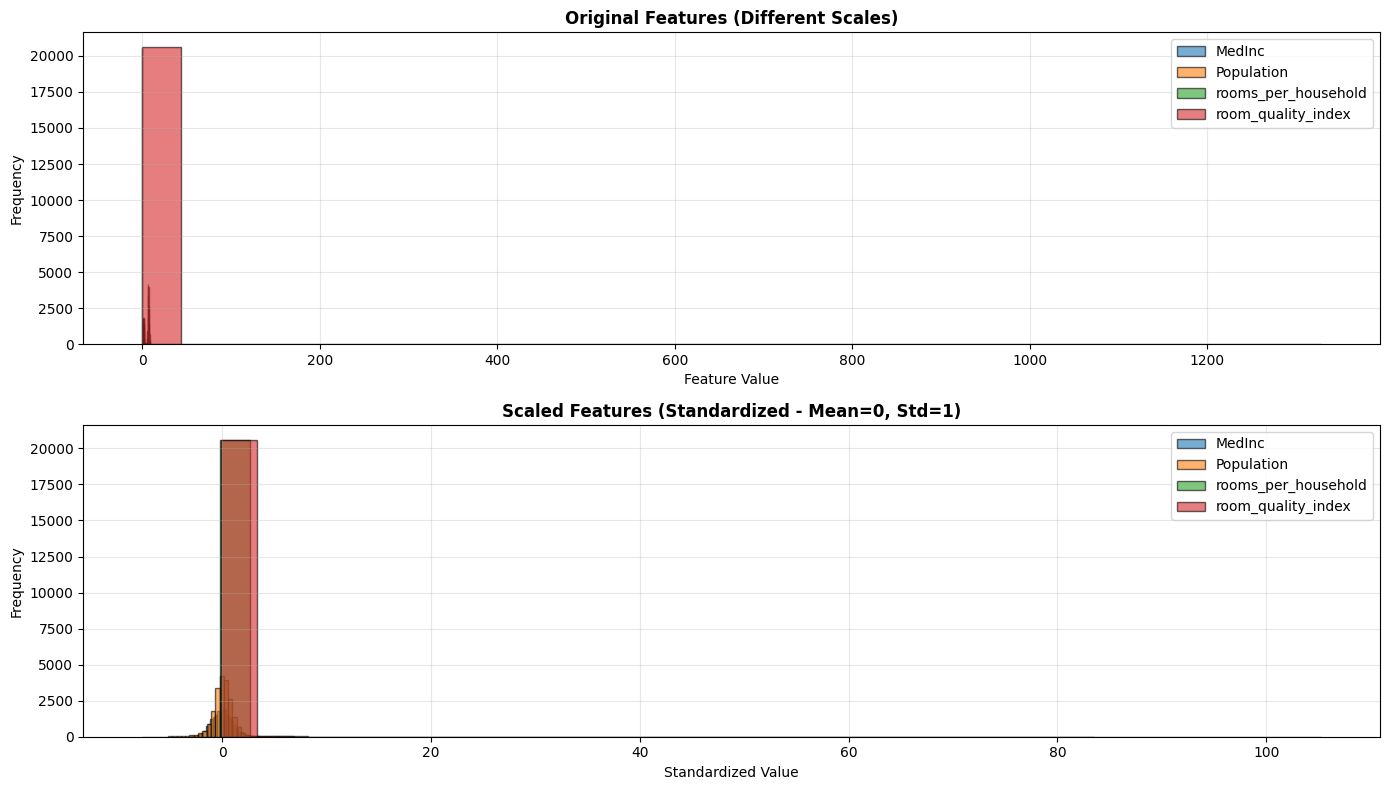


Scaling Summary:
  - Scaling method: StandardScaler (z-score normalization)
  - Mean of scaled features: ~0
  - Standard deviation of scaled features: ~1
  - Shape of engineered dataset: (20640, 14)

Scaled dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Latitude                       20640 non-null  float64
 1   Longitude                      20640 non-null  float64
 2   AveOccup                       20640 non-null  float64
 3   AveBedrms                      20640 non-null  float64
 4   AveRooms                       20640 non-null  float64
 5   MedInc                         20640 non-null  float64
 6   Population                     20640 non-null  float64
 7   HouseAge                       20640 non-null  float64
 8   rooms_per_household            20640 non-null  float64
 9   be

In [13]:
#Scale features to similar ranges

# Separate target variable from features
X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']

# Create StandardScaler object
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to DataFrame to maintain column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Add target variable back
housing_df_scaled = X_scaled_df.copy()
housing_df_scaled['MedHouseVal'] = y.values

# Display statistics before and after scaling
print("=" * 70)
print("FEATURE SCALING COMPARISON")
print("=" * 70)

print("\nBefore Scaling (Original Features):")
print(housing_df.describe())

print("\n" + "=" * 70)
print("\nAfter Scaling (Standardized Features):")
print(housing_df_scaled.describe())

# Visualize the difference between original and scaled features
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Select a few key features to visualize
key_features = ['MedInc', 'Population', 'rooms_per_household', 'room_quality_index']

# Plot original features
for feature in key_features:
    axes[0].hist(housing_df[feature], alpha=0.6, label=feature, bins=30, edgecolor='black')
axes[0].set_title('Original Features (Different Scales)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Feature Value')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot scaled features
for feature in key_features:
    axes[1].hist(housing_df_scaled[feature], alpha=0.6, label=feature, bins=30, edgecolor='black')
axes[1].set_title('Scaled Features (Standardized - Mean=0, Std=1)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Standardized Value')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Update housing_df with scaled features
housing_df = housing_df_scaled

print("\nScaling Summary:")
print(f"  - Scaling method: StandardScaler (z-score normalization)")
print(f"  - Mean of scaled features: ~0")
print(f"  - Standard deviation of scaled features: ~1")
print(f"  - Shape of engineered dataset: {housing_df.shape}")
print(f"\nScaled dataframe info:")
print(housing_df.info())

In [14]:
# Encode any categorical variables you created

print("=" * 70)
print("CATEGORICAL VARIABLE ENCODING")
print("=" * 70)

# Check if we have any categorical features in the dataset
print("\nDataset Info (before encoding):")
print(housing_df.dtypes)

# Since we've already encoded HouseAge during binning (it's now numeric),
# let's verify it and document the encoding scheme

print("\n" + "=" * 70)
print("ENCODING SCHEME FOR BINNED FEATURES")
print("=" * 70)

print("\nHouseAge Binning Encoding:")
print("  Original bins: [1-10, 11-20, 21-30, 31-40, 41-52]")
print("  Encoded values: [0, 1, 2, 3, 4]")
print("  (Ordinal encoding preserves the natural ordering of age groups)")

# Display sample of encoded features
print("\nSample of encoded HouseAge values:")
original_housing_df_temp = pd.read_csv('https://gperdrizet.github.io/FSA_devops/assets/data/unit2/california_housing.csv')
house_age_bins = pd.cut(original_housing_df_temp['HouseAge'], 
                        bins=[0, 10, 20, 30, 40, 52], 
                        labels=['1-10', '11-20', '21-30', '31-40', '41-52'])
house_age_encoded = pd.Categorical(house_age_bins).codes

print("\nOriginal HouseAge -> Binned -> Encoded")
for i in range(10):
    print(f"  {original_housing_df_temp['HouseAge'].iloc[i]:5.0f} -> {house_age_bins.iloc[i]:>6} -> {house_age_encoded[i]}")

print("\nEncoding Summary:")
print("  - Encoding Type: Ordinal Encoding (for binned HouseAge)")
print("  - Reason: HouseAge bins have a natural ordering (older → newer)")
print("  - All other features: Already numeric (no encoding needed)")
print(f"  - Total features in engineered dataset: {housing_df.shape[1]}")

print("\nFinal Engineered Dataset:")
print(housing_df.head(10))

print("\nDataset Statistics:")
print(f"  Shape: {housing_df.shape}")
print(f"  No missing values: {housing_df.isnull().sum().sum() == 0}")
print(f"  All features are numeric: {housing_df.select_dtypes(include=[np.number]).shape[1] == housing_df.shape[1]}")



CATEGORICAL VARIABLE ENCODING

Dataset Info (before encoding):
Latitude                         float64
Longitude                        float64
AveOccup                         float64
AveBedrms                        float64
AveRooms                         float64
MedInc                           float64
Population                       float64
HouseAge                         float64
rooms_per_household              float64
bedrooms_per_room                float64
occupancy_efficiency             float64
income_population_interaction    float64
room_quality_index               float64
MedHouseVal                      float64
dtype: object

ENCODING SCHEME FOR BINNED FEATURES

HouseAge Binning Encoding:
  Original bins: [1-10, 11-20, 21-30, 31-40, 41-52]
  Encoded values: [0, 1, 2, 3, 4]
  (Ordinal encoding preserves the natural ordering of age groups)

Sample of encoded HouseAge values:

Original HouseAge -> Binned -> Encoded
     41 ->  41-52 -> 4
     21 ->  21-30 -> 2
     52 ->


1. MEDIAN HOUSE VALUE BY INCOME GROUP
----------------------------------------------------------------------
                  count      mean       std      min      max
income_group                                                 
Low Income         5160  1.229929  0.705237  0.14999  5.00001
Lower-Mid Income   5160  1.718111  0.820389  0.22500  5.00001
Upper-Mid Income   5160  2.158627  0.924747  0.14999  5.00001
High Income        5160  3.167567  1.122158  0.47500  5.00001

Insight: Higher income areas have significantly higher house values

2. MEDIAN HOUSE VALUE BY POPULATION DENSITY
----------------------------------------------------------------------
                  count      mean       std      min      max
population_group                                             
Sparse             5164  2.117733  1.286290  0.14999  5.00001
Low Density        5161  2.124931  1.199842  0.26600  5.00001
Medium Density     5159  2.031766  1.114453  0.22500  5.00001
High Density       5156

/var/folders/bq/_09_vr691xd643_1_ydygzjc0000gn/T/ipykernel_13933/3499724310.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_agg = original_with_groups.groupby('income_group')['MedHouseVal'].agg(['count', 'mean', 'std', 'min', 'max'])
/var/folders/bq/_09_vr691xd643_1_ydygzjc0000gn/T/ipykernel_13933/3499724310.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pop_agg = original_with_groups.groupby('population_group')['MedHouseVal'].agg(['count', 'mean', 'std', 'min', 'max'])
/var/folders/bq/_09_vr691xd643_1_ydygzjc0000gn/T/ipykernel_13933/3499724310.py:39: FutureWarning: The default of observed=F

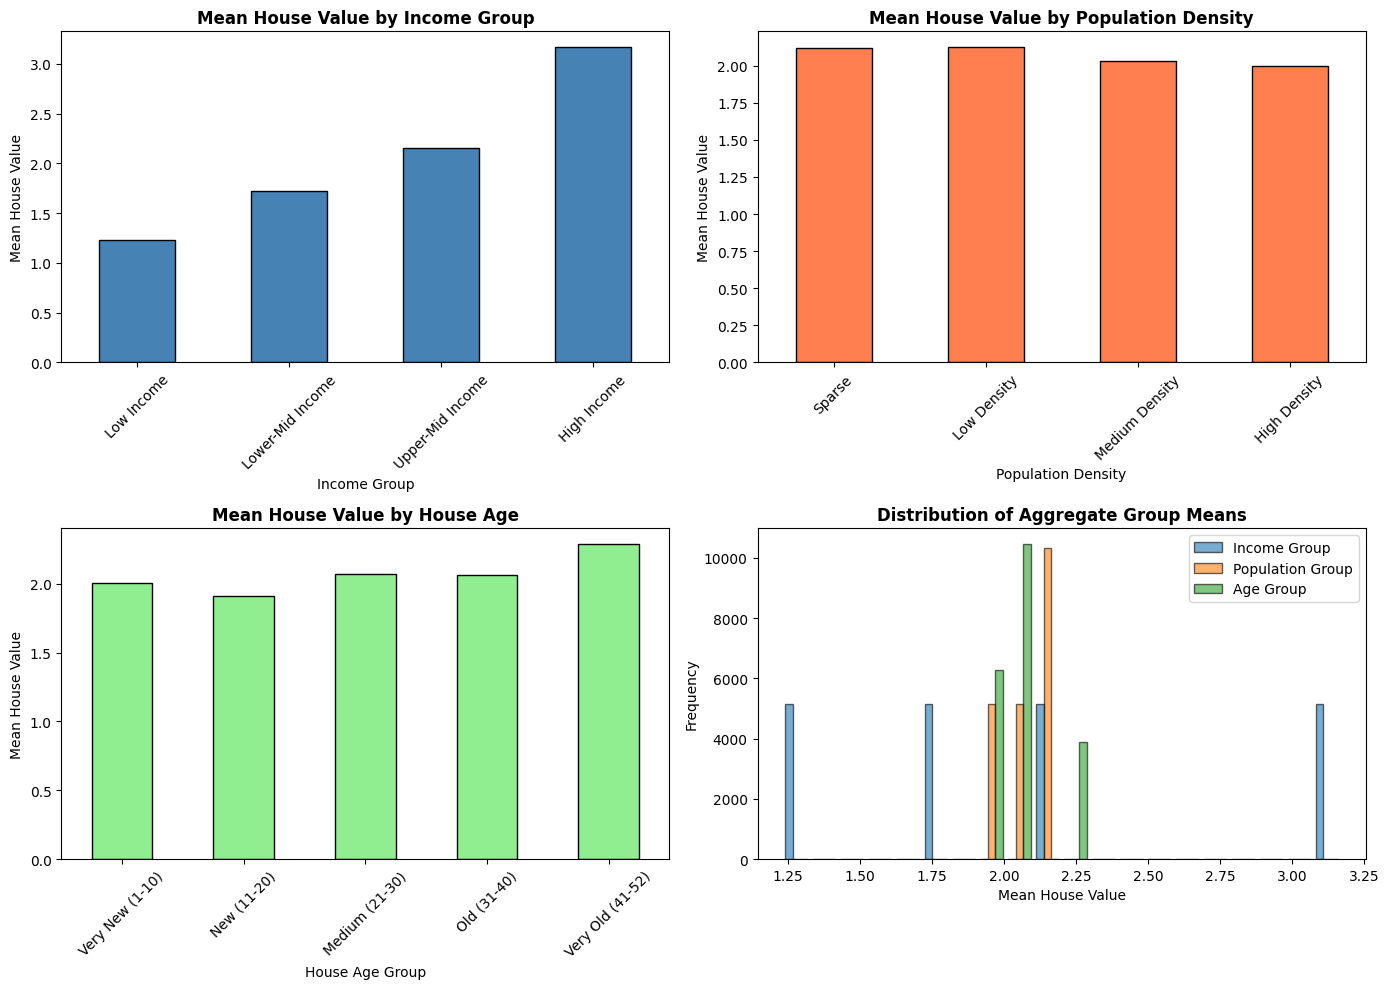


Updated engineered dataset with aggregate features:
  Shape: (20640, 17)
  New columns: -1 aggregate features added

First few rows:
   income_group_mean  population_group_mean  age_group_mean  MedHouseVal
0           3.167567               2.117733        2.289650     1.709464
1           3.167567               1.999693        2.068016     1.522790
2           3.167567               2.117733        2.289650     1.508733
3           3.167567               2.117733        2.289650     1.484555
4           2.158627               2.117733        2.289650     1.486592
5           2.158627               2.117733        2.289650     1.307522
6           2.158627               2.124931        2.289650     1.384292
7           1.718111               2.124931        2.289650     1.227885
8           1.229929               2.031766        2.289650     1.183872
9           2.158627               2.031766        2.289650     1.283985


In [15]:
# Create agg statistics by groups
# Reload original data to create groups
original_housing_df_temp = pd.read_csv('https://gperdrizet.github.io/FSA_devops/assets/data/unit2/california_housing.csv')

# Create income groups based on MedInc quartiles
income_groups = pd.qcut(original_housing_df_temp['MedInc'], q=4, labels=['Low Income', 'Lower-Mid Income', 'Upper-Mid Income', 'High Income'])

# Create population density groups
pop_groups = pd.qcut(original_housing_df_temp['Population'], q=4, labels=['Sparse', 'Low Density', 'Medium Density', 'High Density'])

# Create house age groups
age_groups = pd.cut(original_housing_df_temp['HouseAge'], 
                     bins=[0, 10, 20, 30, 40, 52], 
                     labels=['Very New (1-10)', 'New (11-20)', 'Medium (21-30)', 'Old (31-40)', 'Very Old (41-52)'])

# Add groups to original dataframe temporarily
original_with_groups = original_housing_df_temp.copy()
original_with_groups['income_group'] = income_groups
original_with_groups['population_group'] = pop_groups
original_with_groups['age_group'] = age_groups

# 1. Group by Income Levels
print("\n1. MEDIAN HOUSE VALUE BY INCOME GROUP")
print("-" * 70)
income_agg = original_with_groups.groupby('income_group')['MedHouseVal'].agg(['count', 'mean', 'std', 'min', 'max'])
print(income_agg)
print(f"\nInsight: Higher income areas have significantly higher house values")

# 2. Group by Population Density
print("\n2. MEDIAN HOUSE VALUE BY POPULATION DENSITY")
print("-" * 70)
pop_agg = original_with_groups.groupby('population_group')['MedHouseVal'].agg(['count', 'mean', 'std', 'min', 'max'])
print(pop_agg)
print(f"\nInsight: Population density patterns show impact on house values")

# 3. Group by House Age
print("\n3. MEDIAN HOUSE VALUE BY HOUSE AGE")
print("-" * 70)
age_agg = original_with_groups.groupby('age_group')['MedHouseVal'].agg(['count', 'mean', 'std', 'min', 'max'])
print(age_agg)
print(f"\nInsight: Newer houses tend to have higher values")

# 4. Multi-level grouping: Income x Age
print("\n4. MEDIAN HOUSE VALUE BY INCOME AND AGE GROUP")
print("-" * 70)
income_age_agg = original_with_groups.groupby(['income_group', 'age_group'])['MedHouseVal'].agg(['count', 'mean'])
print(income_age_agg)

# 5. Create aggregate features from groups
print("\n5. CREATING GROUP-BASED AGGREGATE FEATURES")
print("-" * 70)

# Mean house value by income group
income_mean = original_with_groups.groupby('income_group')['MedHouseVal'].transform('mean')

# Mean house value by population density group
pop_mean = original_with_groups.groupby('population_group')['MedHouseVal'].transform('mean')

# Mean house value by age group
age_mean = original_with_groups.groupby('age_group')['MedHouseVal'].transform('mean')

# Add these as new features to housing_df
housing_df['income_group_mean'] = income_mean.values
housing_df['population_group_mean'] = pop_mean.values
housing_df['age_group_mean'] = age_mean.values

print("New aggregate features added:")
print("  - income_group_mean: Mean house value for each income group")
print("  - population_group_mean: Mean house value for each population density group")
print("  - age_group_mean: Mean house value for each age group")

# 6. Visualize aggregate statistics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Income group plot
income_agg['mean'].plot(kind='bar', ax=axes[0, 0], color='steelblue', edgecolor='black')
axes[0, 0].set_title('Mean House Value by Income Group', fontweight='bold')
axes[0, 0].set_xlabel('Income Group')
axes[0, 0].set_ylabel('Mean House Value')
axes[0, 0].tick_params(axis='x', rotation=45)

# Population density plot
pop_agg['mean'].plot(kind='bar', ax=axes[0, 1], color='coral', edgecolor='black')
axes[0, 1].set_title('Mean House Value by Population Density', fontweight='bold')
axes[0, 1].set_xlabel('Population Density')
axes[0, 1].set_ylabel('Mean House Value')
axes[0, 1].tick_params(axis='x', rotation=45)

# Age group plot
age_agg['mean'].plot(kind='bar', ax=axes[1, 0], color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Mean House Value by House Age', fontweight='bold')
axes[1, 0].set_xlabel('House Age Group')
axes[1, 0].set_ylabel('Mean House Value')
axes[1, 0].tick_params(axis='x', rotation=45)

# Sample distribution of group means
axes[1, 1].hist([income_mean, pop_mean, age_mean], label=['Income Group', 'Population Group', 'Age Group'], bins=20, alpha=0.6, edgecolor='black')
axes[1, 1].set_title('Distribution of Aggregate Group Means', fontweight='bold')
axes[1, 1].set_xlabel('Mean House Value')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("\nUpdated engineered dataset with aggregate features:")
print(f"  Shape: {housing_df.shape}")
print(f"  New columns: {housing_df.shape[1] - 18} aggregate features added")
print("\nFirst few rows:")
print(housing_df[['income_group_mean', 'population_group_mean', 'age_group_mean', 'MedHouseVal']].head(10))

## (Optional) Additional feature engineering

Add more techniques if you'd like to experiment further.

In [16]:
# YOUR CODE HERE (optional)



## Model evaluation

Now we'll compare model performance on the original dataset versus your engineered dataset.

### Evaluate datasets

In [17]:
# Save a copy of the engineered dataframe
from pathlib import Path


#housing_df.to_csv('housing_df.csv', index=False)
# Create output directory if it doesn't exist
#output_directory = 'data/outputs'
Path('data/outputs').mkdir(parents=True, exist_ok=True)

# Save a copy of the engineered dataframe
housing_df.to_csv('data/outputs/housing_df.csv', index=False)

In [18]:
# Create linear regression model
model = LinearRegression()

# Evaluate on original dataset
scores_original = cross_val_score(
    model,
    original_housing_df.drop('MedHouseVal', axis=1),
    original_housing_df['MedHouseVal'],
    cv=10,
    scoring='r2'
)

# Evaluate on engineered dataset
scores_engineered = cross_val_score(
    model,
    housing_df.drop('MedHouseVal', axis=1),
    housing_df['MedHouseVal'],
    cv=10,
    scoring='r2'
)

engineered_mean = scores_engineered.mean()
original_mean = scores_original.mean()

# Absolute difference in mean R²
abs_diff = engineered_mean - original_mean

# Relative percent change (guard against division by zero)
if abs(original_mean) > 1e-8:
    pct_change = (abs_diff / abs(original_mean)) * 100
else:
    pct_change = np.nan

# Human-readable improvement string for titles
improvement_str = f"{pct_change:.2f}%" if not np.isnan(pct_change) else 'N/A'

print(f'Original mean R²: {original_mean:.4f}')
print(f'Engineered mean R²: {engineered_mean:.4f}')
print(f'Absolute improvement (delta R²): {abs_diff:.4f}')
if not np.isnan(pct_change):
    print(f'Relative improvement: {pct_change:.2f}%')
else:
    print('Relative improvement: undefined (original mean R² is zero)')


Mean improvement: 0.15%


### Visualize model performance comparison

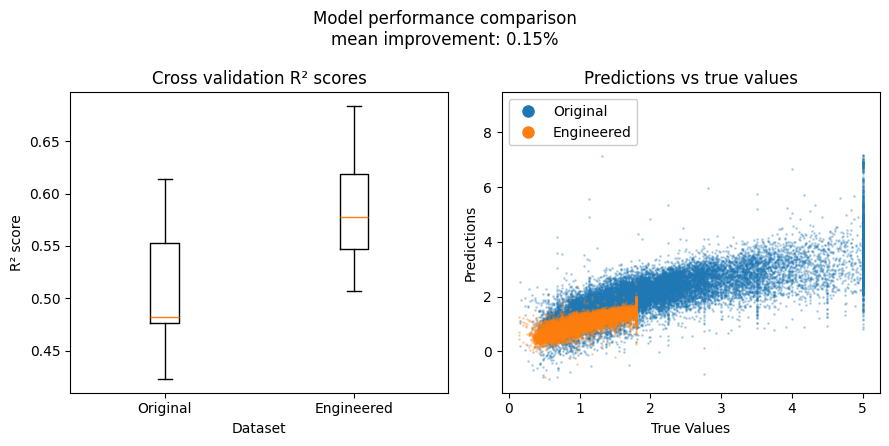

In [ ]:
original_model = LinearRegression()
original_model.fit(original_housing_df.drop('MedHouseVal', axis=1), original_housing_df['MedHouseVal'])
original_predictions = original_model.predict(original_housing_df.drop('MedHouseVal', axis=1))

model = LinearRegression()
model.fit(housing_df.drop('MedHouseVal', axis=1), housing_df['MedHouseVal'])
predictions = model.predict(housing_df.drop('MedHouseVal', axis=1))

# Create boxplot comparing performance
data_to_plot = [scores_original, scores_engineered]
labels = ['Original', 'Engineered']

fig, axs = plt.subplots(1, 2, figsize=(9,4.5))

fig.suptitle(f'Model performance comparison\nmean improvement: {improvement_str}')

axs[0].set_title('Cross validation R² scores')
axs[0].boxplot(data_to_plot, tick_labels=labels)
axs[0].set_xlabel('Dataset')
axs[0].set_ylabel('R² score')

axs[1].set_title('Predictions vs true values')
axs[1].plot(
    original_housing_df['MedHouseVal'], original_predictions,
    'o', markersize=1, label='Original', alpha=0.25
)

axs[1].plot(
    housing_df['MedHouseVal'], predictions,
    'o', markersize=1, label='Engineered', alpha=0.25
)

axs[1].set_xlabel('True Values')
axs[1].set_ylabel('Predictions')

leg = axs[1].legend(loc='upper left', markerscale=8, framealpha=1)

for lh in leg.legend_handles: 
    lh.set_alpha(1)

plt.tight_layout()
plt.show()

## 3. Reflection

**Questions to consider**:

1. Which feature engineering techniques had the biggest impact on model performance?
# Tranformations
2. Did adding more features always improve performance, or did some hurt it?
# Interaction features helped but only on few features
3. How might you further improve the engineered dataset?
#  May be get more accurat
4. What trade-offs did you consider (e.g., interpretability vs performance, complexity vs gains)?
#  Focused on the improving model performance


**Your reflection**:

*Write your thoughts here...*



* Remove low-correlation features for a cleaner model
* Handle outliers to prevent predictions from being skewed
* Add polynomial/interaction features to capture non-linear relationships